### Pré traitement des données

On pré traite les données pour les mettres sous forme de liste : [simu_1, ..., simu_n] avec simu_1=[params_1, data_1].

Ici on montre un exemple des données que nous avons

# Post-traitement d'un ensemble de simulation

## Phase d'optimisation

On traite dans un premier temps les données à la fin de l'optimisation : coefficient de friction, vitesses du modèle/vitesse d'observation. On essaie de tracer ça en échelle de couleur en fonction de chaque paramètre.

Le dossier courant est /mnt/data/ejager/Greenland/RUNS


### Analyse de la régularisation

On reprend le script plotLcurve.sh et son script python associé (Lcurve. Dans un premier temps, il faut avoir fait tourné le script bash PrepareLcurve.sh (à ajouter dans Astro/postpro/bash/). On obtient alors les 3 .csv contenant les valeurs finales de J0, Jreg et Jdiv. On charge également le fichier parameter.txt pour avoir les valeurs des lambdas.

In [162]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import pandas as pd

source="/mnt/data/ejager/Greenland/postpro/"

CostU = pd.read_csv(source+"Lcurve/CSV/CostU.csv", sep="  ", header = None)
CostReg = pd.read_csv(source+"Lcurve/CSV/CostReg.csv", sep="  ", header = None)
CostDiv = pd.read_csv(source+"Lcurve/CSV/CostDiv.csv", sep="   ", header = None)

Params = pd.DataFrame()

n_simu = 21

for i in range(n_simu):
    Params["s"+str(i)]=pd.read_csv(source+"output/parameter_"+str(i)+".txt", sep=" ", header = None)[4]

print(Params.iloc[0:4])
for j in range(4):
    Params.iloc[j]=pd.to_numeric(Params.iloc[j], downcast='float')

print(Params)

## on change les valeurs de E; 3 eme valeur

Params.iloc[3] = Params.iloc[3]**(-3)

## idem pour m

Params.iloc[2] = 1/Params.iloc[2]


print(CostU)
print(CostReg)
print(CostDiv)
print(Params)

lda_Reg = Params.iloc[0,:]
lda_dHdt = Params.iloc[1,:]

                     s0                    s1                    s2  \
0  3.23743139180000e+07  2.36772589020000e+05  5.71349623880000e+05   
1  1.12702841900000e-04  7.94137102000000e-06  1.64268327600000e-05   
2                     2                     4                     3   
3     0.621487638992155     0.689101628066358     0.652766915653143   

                     s3                s4                    s5  \
0  1.77160080140000e+03    1.12103423e+05  6.85554867880000e+06   
1  5.43327170000000e-06    6.65342237e-06  6.57426639000000e-06   
2                     4                 3                     3   
3      1.05980978624144  1.09342438091905     0.709969099712599   

                     s6                    s7                 s8  \
0  3.29521022220000e+05  5.09694113380000e+04     2.04326785e+06   
1  2.66178387700000e-05  2.45406028000000e-06     1.85463406e-05   
2                     4                     4                  2   
3     0.718968375386159     0.869924

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


Maintenant on crée les fonctions qui vont tracer nos fameuses courbes en L.

In [163]:
def plotLcurve(costX, costY, param, X_label, Y_label, save):
    
    name_param = ['lda_reg', 'lda_div', 'm', 'E', 'u_obs']
    
    n_params = param.shape[0]
    size = n_params
    fig, axes = plt.subplots(size, 1, dpi=100)
    fig.set_figheight(4*size)
    fig.set_figwidth(5)
    
    for j in range(n_params):
        np_param = np.array(param)
        
        
        if type(np_param[j,0])==str:
            list_param=list(np_param[j,:])
            my_color = ['darkblue','cyan','green','orange','red']
            some_list= []
            count=0
            for i in range(len(costX)):
                elmt=list_param[i]
                if elmt not in some_list:
                    axes[j].scatter(costX[i], costY[i], color=my_color[count], label=list_param[i])
                    some_list.append(list_param[i])
                    count+=1
                else:
                    axes[j].scatter(costX[i], costY[i], color=my_color[some_list.index(elmt)], label=elmt)
        else:
            min_param = np.min(np_param[j])
            max_param = np.max(np_param[j])
            
            if np.log10(max_param/min_param)>1:
                np_param_j = np_param[j].astype(np.float64)
                cur = axes[j].scatter(costX,costY, c=np.log10(np_param_j), cmap='brg', edgecolors='black', linewidths=0.5, marker = 'o')
            else:
                cur = axes[j].scatter(costX,costY, c=np_param[j], cmap='gist_stern', edgecolors='black', linewidths=0.5, marker = 'o')
            fig.colorbar(cur, ax=axes[j], label = name_param[j])

        # Grille :
        axes[j].grid()

         # Axes : 
        #plt.axhline(color="black") 
        #plt.axvline(color="black")
        axes[j].set_xlabel(X_label, fontsize = 15)
        axes[j].set_ylabel(Y_label, fontsize = 15)


         # échelle logarithmique

        axes[j].set_xscale('log')
        axes[j].set_yscale('log')

        # Fenêtre à afficher :
        axes[j].axis([0.9*min(costX[:]),1.1*max(costX[:]),0.9*min(costY[:]),1.1*max(costY[:])])

            
    plt.show()
    
    print(['darkblue','cyan','green','orange','red'])
    print(some_list)


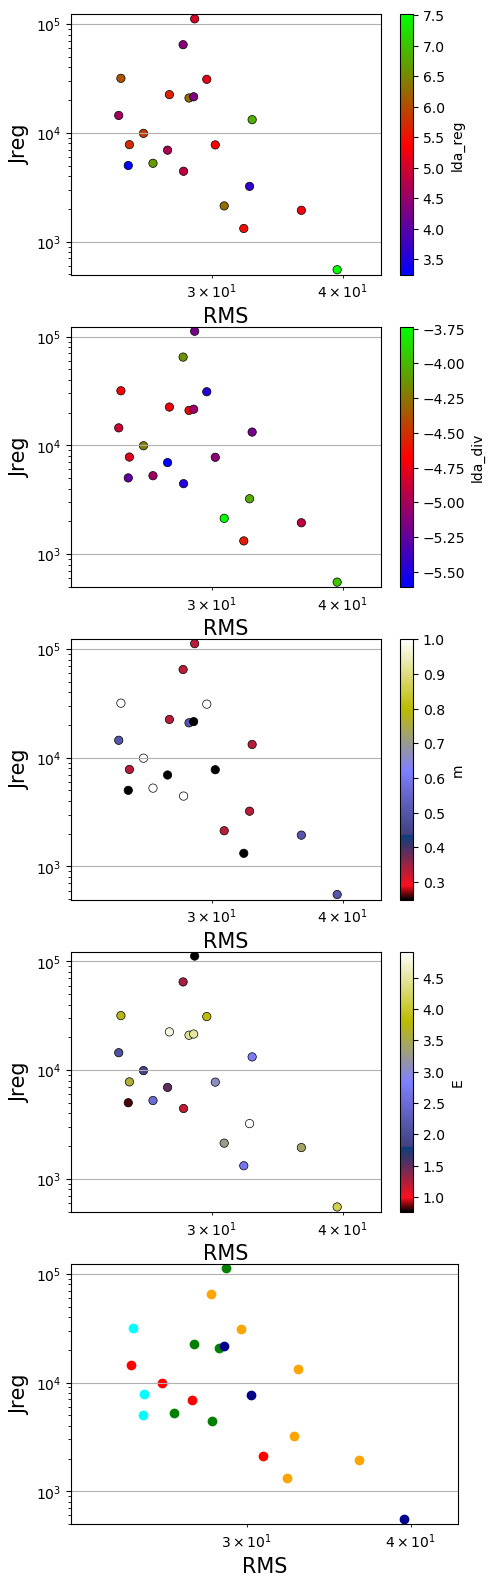

['darkblue', 'cyan', 'green', 'orange', 'red']
['200_2018', '200_2017', '250_v1', '200_2016', '200_2015']


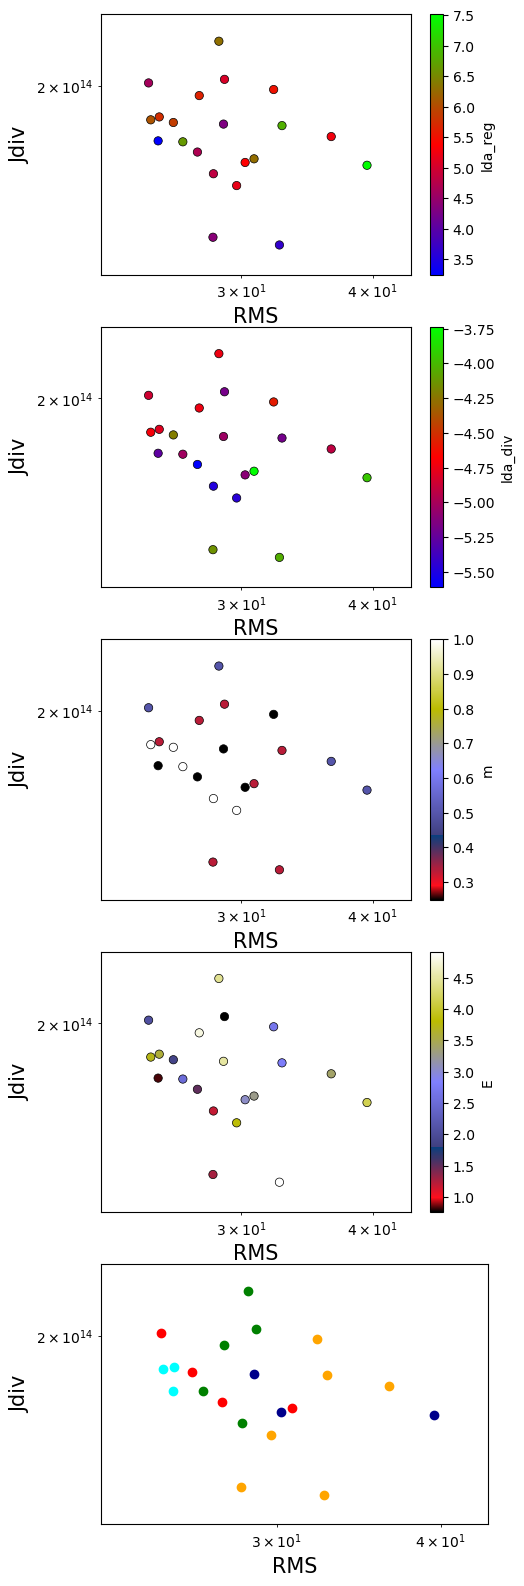

['darkblue', 'cyan', 'green', 'orange', 'red']
['200_2018', '200_2017', '250_v1', '200_2016', '200_2015']


In [164]:
plotLcurve(CostU.iloc[:,2], CostReg.iloc[:,1], Params, "RMS", "Jreg", source+"Lcurve_U_Reg")
plotLcurve(CostU.iloc[:,2], CostDiv.iloc[:,1], Params, "RMS", "Jdiv", source+"Lcurve_U_Div")

### Pré traitement bash

On a créé un fichier .pvd avec MakePVDOPTIM3.sh (après avoir rassemblé les fichiers OPTIM.pvtu dans LatinHyper40/PVTU_OPTIM et LatinHyper40/m1_fine/PVTU_OPTIM -> pour m=1 les simulations CTRL et IMIP sont sensé ếtre bonne).

Après cela, on crée un ensemble de slice stockées dans output/ et on ajoute les fichiers de paramètres (pvpython slice.py puis ./MoveParameters.sh) 

In [165]:
import pandas


# on regarde les donnees pour voir a quoi elles ressemblent

df = pandas.read_csv(source+"output/results_0.csv")

print(df)

               h       slc  slipcoef  ssavelocity:0  ssavelocity:1  \
0       0.900000  0.013691  0.001604       0.000088       0.008319   
1       0.900000  0.013777  0.002194       0.006777       0.021488   
2       0.900000  0.013934  0.001714      -0.045458      -0.048872   
3       0.900000  0.014129  0.001588      -0.000252       0.000069   
4       0.900000  0.013796  0.007097      -0.005755      -0.004257   
5       0.900000  0.014128  0.001503      -0.000213       0.000077   
6     365.262490  0.001006  0.043267   -1872.957300     577.661930   
7      27.360101  0.515221  0.001218      65.368095     213.941420   
8    1377.263900  0.009928  0.010065    -118.847420     -26.764823   
9    1220.495800  0.009078  0.011091    -134.697190     -32.897062   
10   2507.311800  0.016372  0.018764     -16.588095      -2.037636   
11   2504.311500  0.016314  0.018638     -16.744416      -2.070419   
12   1844.150100  0.011712  0.011971     -61.417727      -4.211471   
13   1791.524100  0.

In [166]:
import pandas


# on regarde les donnees pour voir a quoi elles ressemblent

df = pandas.read_csv(source+"output/parameter_0.txt", sep=" ", header = None)

print(df)

        0  1       2     3                     4
0  PARAM0  :  Lambda  reg=  3.23743139180000e+07
1  PARAM0  :  Lambda  div=  1.12702841900000e-04
2  PARAM0  :       m     =                     2
3  PARAM0  :       E     =     0.621487638992155
4  PARAM0  :   u_obs     =              200_2018


Maintenant on rassemble toutes les données dans un grand tableau : df_simu

In [167]:
import pandas as pd
import numpy as np
n_simu = 21

df_simus = pd.DataFrame()
df_param = pd.DataFrame()

for i in range(n_simu):
    df_simus_in = pd.read_csv(source+"output/results_"+str(i)+".csv")
    df_simus_in = df_simus_in.add_prefix("s"+str(i)+":")
    #print(df_simus_in)
    df_simus = pd.concat([df_simus,df_simus_in], axis=1)
    #print(df_simus)
    df_param["s"+str(i)]=pd.read_csv(source+"output/parameter_"+str(i)+".txt", sep=" ", header = None)[4]
    
print(df_simus)

df_simus = df_simus.sort_values('s20:Points:0')


print(df_param.iloc[0:4])
for j in range(4):
    df_param.iloc[j]=pd.to_numeric(df_param.iloc[j], downcast='float')

print(df_param)

## on change les valeurs de E; 3 eme valeur

df_param.iloc[3] = df_param.iloc[3]**(-3)

print(df_param)


            s0:h    s0:slc  s0:slipcoef  s0:ssavelocity:0  s0:ssavelocity:1  \
0       0.900000  0.013691     0.001604          0.000088          0.008319   
1       0.900000  0.013777     0.002194          0.006777          0.021488   
2       0.900000  0.013934     0.001714         -0.045458         -0.048872   
3       0.900000  0.014129     0.001588         -0.000252          0.000069   
4       0.900000  0.013796     0.007097         -0.005755         -0.004257   
5       0.900000  0.014128     0.001503         -0.000213          0.000077   
6     365.262490  0.001006     0.043267      -1872.957300        577.661930   
7      27.360101  0.515221     0.001218         65.368095        213.941420   
8    1377.263900  0.009928     0.010065       -118.847420        -26.764823   
9    1220.495800  0.009078     0.011091       -134.697190        -32.897062   
10   2507.311800  0.016372     0.018764        -16.588095         -2.037636   
11   2504.311500  0.016314     0.018638        -16.7

### Tracé des graphiques

On a maintenant toutes les données dont on a besoin, on peut alors tracer plusieurs graphiques. Tout d'abord on crée une fonction permettant de tracer les données en fonction de l'espace et avec une échelle de couleur en fonction d'un paramètre (m, E, lambda div, lambda reg, u_obs).

In [168]:
from matplotlib import pyplot as plt
import matplotlib as mpl

def plot1log(param,df_X, df_Y):
    n_lines = df_X.shape[1]
    
    min_param = np.min(param)
    max_param = np.max(param)
    
    
    
    norm = mpl.colors.LogNorm(vmin=min_param, vmax=max_param)
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
    cmap.set_array([])
    
    
    fig, ax = plt.subplots(dpi=100)
    for i in range(n_lines):
        #print(df_X[i])
        ax.plot(df_X[i], df_Y[i], c=cmap.to_rgba(param[0,i]))
    fig.colorbar(cmap)
    plt.yscale('log')
    plt.show()


def plot1(param,df_X, df_Y):
    n_lines = df_X.shape[1]
    
    min_param = np.min(param)
    max_param = np.max(param)
    
    
    
    norm = mpl.colors.LogNorm(vmin=min_param, vmax=max_param)
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
    cmap.set_array([])
    
    
    fig, ax = plt.subplots(dpi=100)
    for i in range(n_lines):
        #print(df_X[i])
        ax.plot(df_X[i], df_Y[i], c=cmap.to_rgba(param[0,i]))
    fig.colorbar(cmap)
    plt.show()

0     5.183825e-01
1     3.705077e+01
2     1.978479e+01
3     2.366277e+10
4     4.373352e+01
5     1.143256e+01
6     3.172506e+01
7     3.690241e+02
8     6.877178e+00
9     1.453905e+01
10    6.980062e+06
11    1.343890e+02
12    4.387700e+01
13    1.919855e+02
14    1.358279e+01
15    1.165630e+02
16    2.265916e+01
17    4.238825e+01
18    3.199272e-01
19    4.891359e+01
20    1.087652e+01
dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
dtype: float64


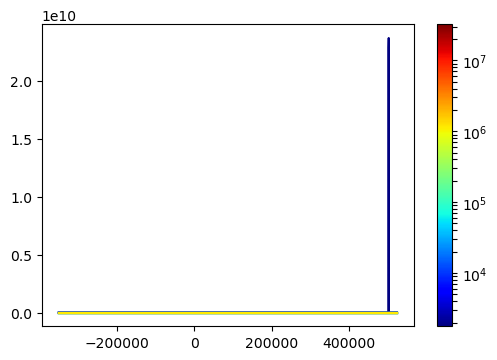

In [169]:
df_ptx = pd.DataFrame()  # positions x
df_slc = pd.DataFrame()  # slip coefficient

for i in range(n_simu):
    df_ptx[i] = df_simus["s"+str(i)+":Points:0"]
    df_slc[i] = df_simus["s"+str(i)+":slc"]
    
    
print(df_slc.max(axis=0))
print(df_slc.min(axis=0))
plot1(np.array(df_param.iloc[[0]]), df_ptx,df_slc)

0     2994.677131
1     3253.462032
2     3305.116053
3     3097.582324
4     2315.711310
5     3205.730758
6     3257.457386
7     3015.451640
8     2659.573759
9     2966.873161
10    3187.120423
11    2990.956263
12    3245.159098
13    3197.223678
14    2713.083749
15    3193.570588
16    2988.845560
17    3237.314036
18    2254.025465
19    2325.169805
20    3312.541408
dtype: float64
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
dtype: float64


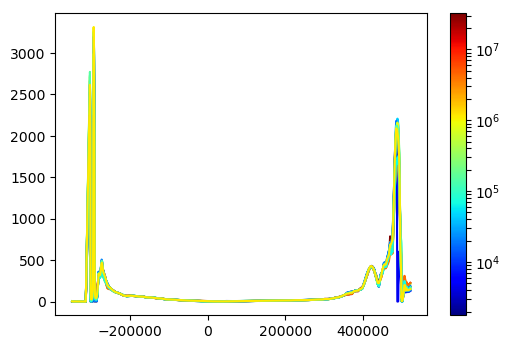

In [170]:
df_ptx = pd.DataFrame()  # positions x
df_ssavel = pd.DataFrame()  # slip coefficient

for i in range(n_simu):
    df_ptx[i] = df_simus["s"+str(i)+":Points:0"]
    df_ssavel[i] = (df_simus["s"+str(i)+":ssavelocity:0"]**2+df_simus["s"+str(i)+":ssavelocity:1"]**2)**0.5
    
print(df_ssavel.max(axis=0))
print(df_ssavel.min(axis=0))
plot1(np.array(df_param.iloc[[0]]), df_ptx,df_ssavel)

2         1.609474
83        0.201275
84        0.110157
82        0.050396
81        0.044868
92        0.032010
91        0.020178
89        0.019212
88        0.021544
85        0.035839
80        0.015852
79        0.008088
77        0.000000
0         0.051840
3         0.000473
90        0.000456
5         0.000413
4         0.040397
87        0.000000
86        0.176154
78        0.181161
1         0.181330
6      2456.370144
101    2348.046074
100    2264.231096
161    2141.671669
124    1892.544005
121    1711.880472
120    1359.965944
119     663.044795
          ...     
459     339.835300
447     224.915448
446     159.250998
492     123.759932
454      82.140285
453      50.737517
494      81.391048
493       0.576292
502       0.738837
501       4.177234
500       3.268306
509      39.067574
478      55.098148
477      44.794385
505      65.961240
482      91.291148
474     160.971245
452     242.750936
451     245.313178
464     236.637557
463     153.544881
429     182.

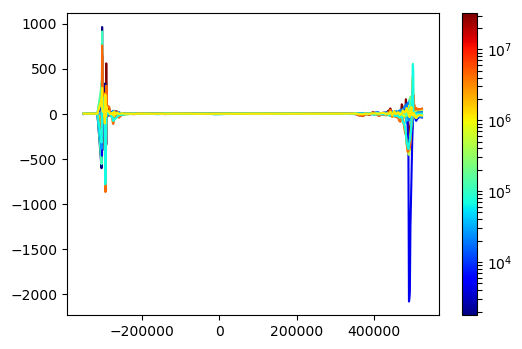

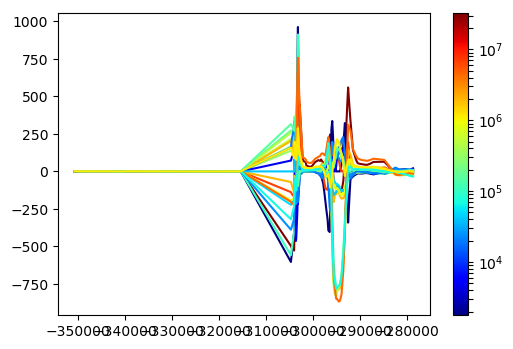

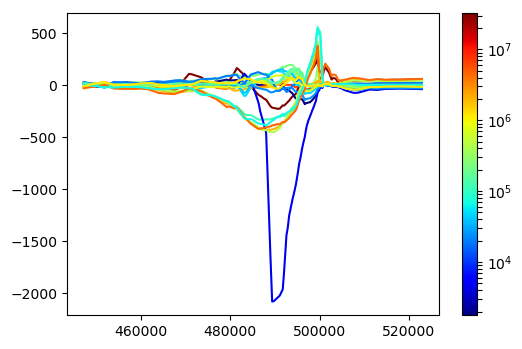

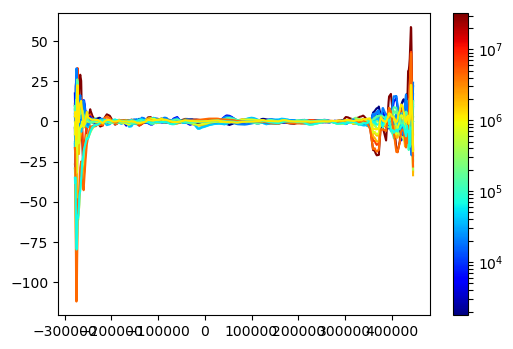

In [171]:
med_ssavel=df_ssavel.median(axis=1)
print(med_ssavel)
df_ssavel_med=df_ssavel.sub(med_ssavel, axis=0)

#print(df_ssavel)
#print(df_ssavel_med)

print(type(med_ssavel))

plot1(np.array(df_param.iloc[[0]]), df_ptx,df_ssavel_med)
plot1(np.array(df_param.iloc[[0]]), df_ptx.head(100),df_ssavel_med.head(100))
plot1(np.array(df_param.iloc[[0]]), df_ptx.tail(100),df_ssavel_med.tail(100))
plot1(np.array(df_param.iloc[[0]]), df_ptx.iloc[100:-100],df_ssavel_med.iloc[100:-100])

On continue sur notre lancée en traçant ça pour chaque paramètre dans des subplots.

In [172]:
from matplotlib import pyplot as plt
import matplotlib as mpl



def plotN(param,df_X, df_Y):
    n_lines = df_X.shape[1]
    n_params = param.shape[0]
    size = (n_params-1)//3+1
    fig, axes = plt.subplots(3, size, dpi=100)
    fig.set_figheight(15)
    fig.set_figwidth(5*size)
    pos = 0
    
    for j in range(n_params):
        R = j//size
        Q = j-R*size
        np_param = np.array(param)
        print(np_param[j,:])

        if type(np_param[j,0])==str:
            list_param=list(np_param[j,:])
            my_color = ['darkblue','cyan','green','orange','red']
            some_list= []
            count=0
            for i in range(n_lines):
                #print(df_X[i])
                elmt=list_param[i]
                if elmt not in some_list:
                    print(elmt)
                    print(some_list)
                    axes[R,Q].plot(df_X[i], df_Y[i], color=my_color[count], label=list_param[i])
                    some_list.append(list_param[i])
                    count+=1
                else:
                    print(some_list)
                    print(elmt)
                    print(some_list.index(elmt))
                    axes[R,Q].plot(df_X[i], df_Y[i], color=my_color[some_list.index(elmt)], label=elmt)
            axes[R,Q].legend()
        else:
            min_param = np.min(np_param[j])
            max_param = np.max(np_param[j])

            print(np.log(max_param/min_param))
            if np.log(max_param/min_param)>2:
                norm = mpl.colors.LogNorm(vmin=min_param, vmax=max_param)
            else:
                norm = mpl.colors.Normalize(vmin=min_param, vmax=max_param)
            cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
            cmap.set_array([])

            for i in range(n_lines):
                #print(df_X[i])
                axes[R,Q].plot(df_X[i], df_Y[i], c=cmap.to_rgba(np_param[j,i]))
            fig.colorbar(cmap, ax=axes[R,Q])
    plt.show()
    
    

[32374314.0 236772.59375 571349.625 1771.600830078125 112103.421875
 6855548.5 329521.03125 50969.41015625 2043267.875 1932405.5 4633.765625
 41995.9453125 187863.453125 24427.3515625 453119.78125 20496.279296875
 762439.5 154770.875 4430425.5 67802.3203125 1161366.0]
9.813237047974212
[0.00011270284448983148 7.941371222841553e-06 1.6426833099103533e-05
 5.433271780930227e-06 6.653422587987734e-06 6.574266535608331e-06
 2.6617839466780424e-05 2.45406022258976e-06 1.8546341379988007e-05
 0.00018366389849688858 9.142240014625713e-05 1.4118932085693814e-05
 1.2315561434661504e-05 7.176426152000204e-05 1.8259819626109675e-05
 9.241810403182171e-06 6.0626181948464364e-05 3.469796638455591e-06
 9.516505087958649e-06 3.2817124520079233e-06 1.968000469787512e-05]
4.315363562096216
[2.0 4.0 3.0 4.0 3.0 3.0 4.0 4.0 2.0 3.0 3.0 2.0 2.0 3.0 3.0 4.0 1.0 1.0
 1.0 1.0 1.0]
1.3862943611198906
[4.16583974790273 3.0559775276146977 3.5952205784666655 0.8400714044988459
 0.7649510936944387 2.7943554700637

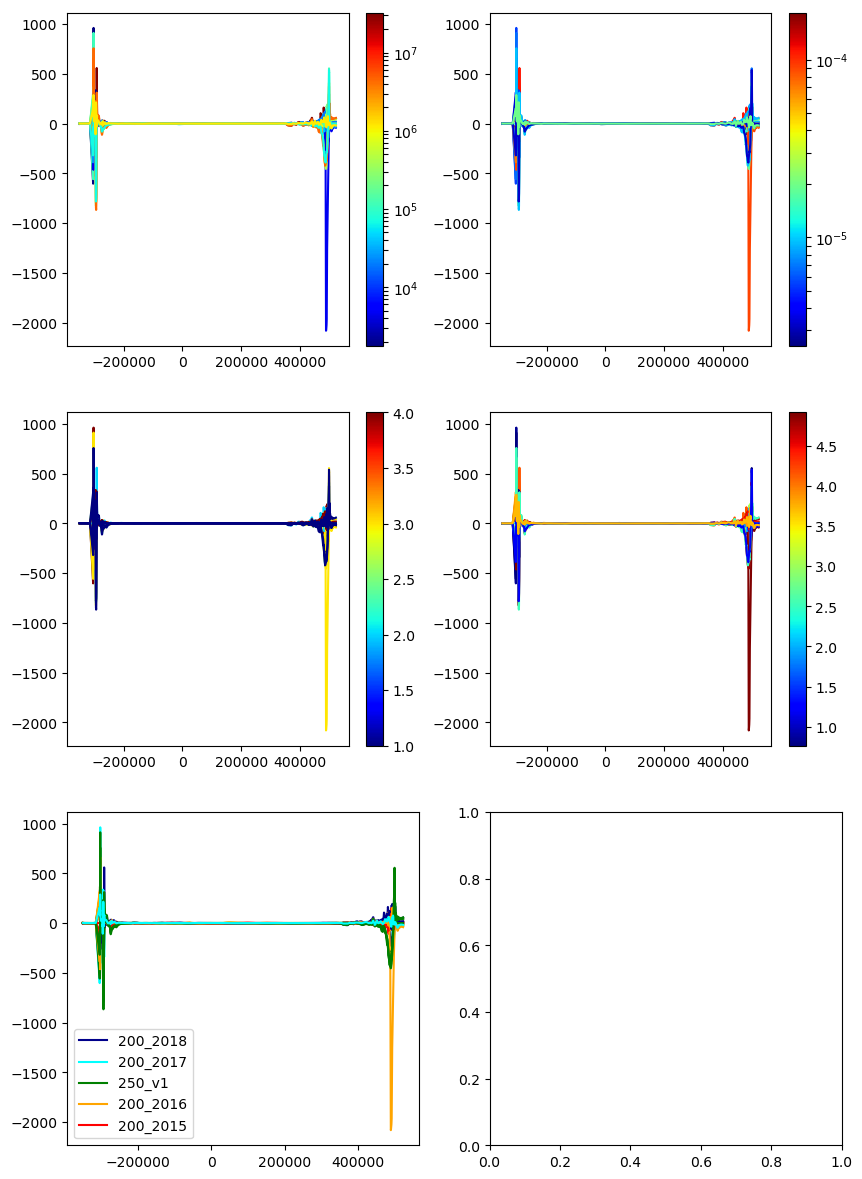

[32374314.0 236772.59375 571349.625 1771.600830078125 112103.421875
 6855548.5 329521.03125 50969.41015625 2043267.875 1932405.5 4633.765625
 41995.9453125 187863.453125 24427.3515625 453119.78125 20496.279296875
 762439.5 154770.875 4430425.5 67802.3203125 1161366.0]
9.813237047974212
[0.00011270284448983148 7.941371222841553e-06 1.6426833099103533e-05
 5.433271780930227e-06 6.653422587987734e-06 6.574266535608331e-06
 2.6617839466780424e-05 2.45406022258976e-06 1.8546341379988007e-05
 0.00018366389849688858 9.142240014625713e-05 1.4118932085693814e-05
 1.2315561434661504e-05 7.176426152000204e-05 1.8259819626109675e-05
 9.241810403182171e-06 6.0626181948464364e-05 3.469796638455591e-06
 9.516505087958649e-06 3.2817124520079233e-06 1.968000469787512e-05]
4.315363562096216
[2.0 4.0 3.0 4.0 3.0 3.0 4.0 4.0 2.0 3.0 3.0 2.0 2.0 3.0 3.0 4.0 1.0 1.0
 1.0 1.0 1.0]
1.3862943611198906
[4.16583974790273 3.0559775276146977 3.5952205784666655 0.8400714044988459
 0.7649510936944387 2.7943554700637

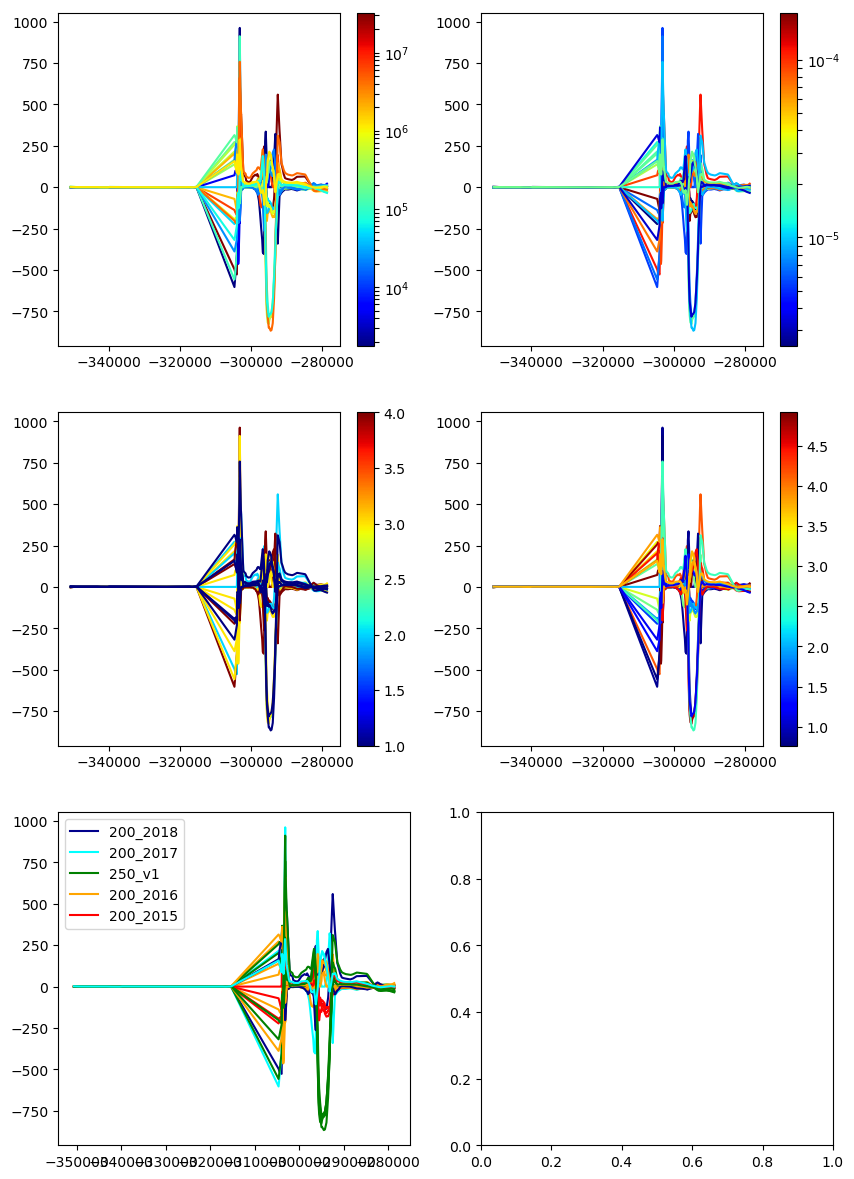

[32374314.0 236772.59375 571349.625 1771.600830078125 112103.421875
 6855548.5 329521.03125 50969.41015625 2043267.875 1932405.5 4633.765625
 41995.9453125 187863.453125 24427.3515625 453119.78125 20496.279296875
 762439.5 154770.875 4430425.5 67802.3203125 1161366.0]
9.813237047974212
[0.00011270284448983148 7.941371222841553e-06 1.6426833099103533e-05
 5.433271780930227e-06 6.653422587987734e-06 6.574266535608331e-06
 2.6617839466780424e-05 2.45406022258976e-06 1.8546341379988007e-05
 0.00018366389849688858 9.142240014625713e-05 1.4118932085693814e-05
 1.2315561434661504e-05 7.176426152000204e-05 1.8259819626109675e-05
 9.241810403182171e-06 6.0626181948464364e-05 3.469796638455591e-06
 9.516505087958649e-06 3.2817124520079233e-06 1.968000469787512e-05]
4.315363562096216
[2.0 4.0 3.0 4.0 3.0 3.0 4.0 4.0 2.0 3.0 3.0 2.0 2.0 3.0 3.0 4.0 1.0 1.0
 1.0 1.0 1.0]
1.3862943611198906
[4.16583974790273 3.0559775276146977 3.5952205784666655 0.8400714044988459
 0.7649510936944387 2.7943554700637

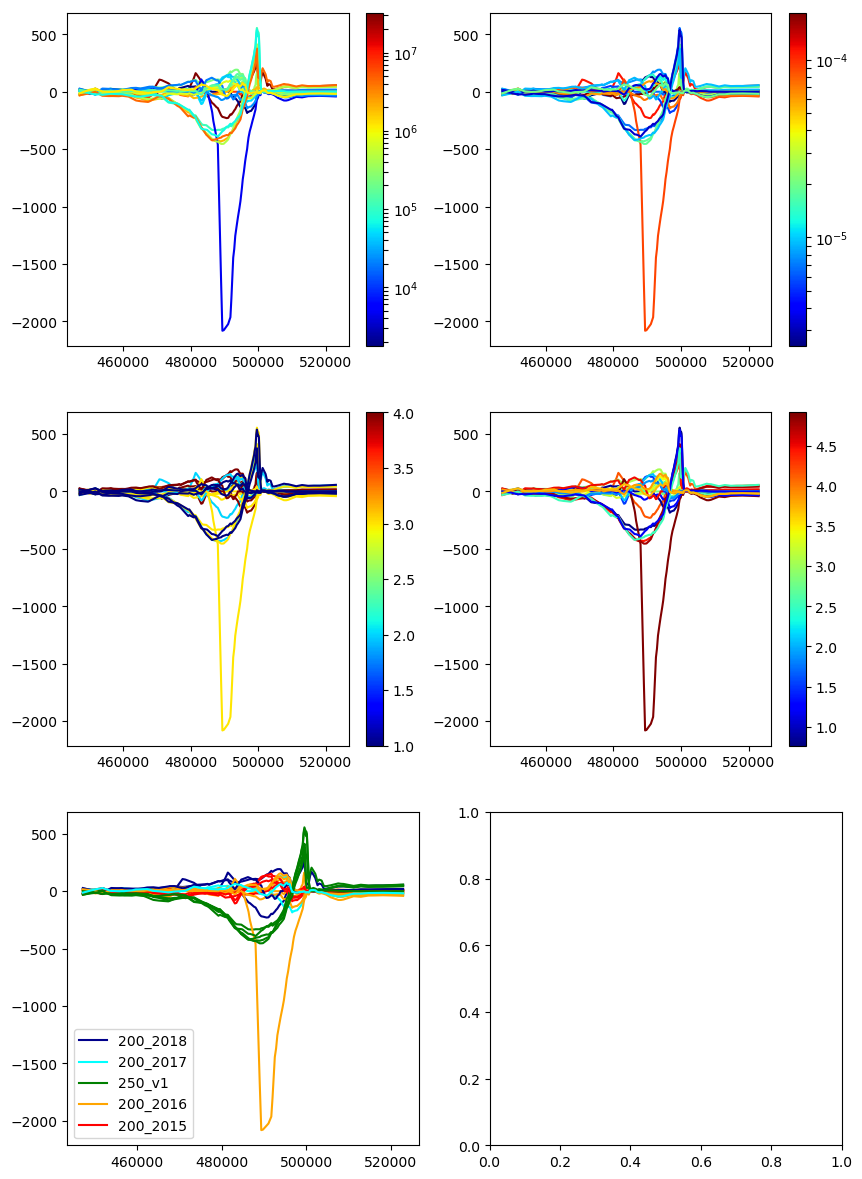

[32374314.0 236772.59375 571349.625 1771.600830078125 112103.421875
 6855548.5 329521.03125 50969.41015625 2043267.875 1932405.5 4633.765625
 41995.9453125 187863.453125 24427.3515625 453119.78125 20496.279296875
 762439.5 154770.875 4430425.5 67802.3203125 1161366.0]
9.813237047974212
[0.00011270284448983148 7.941371222841553e-06 1.6426833099103533e-05
 5.433271780930227e-06 6.653422587987734e-06 6.574266535608331e-06
 2.6617839466780424e-05 2.45406022258976e-06 1.8546341379988007e-05
 0.00018366389849688858 9.142240014625713e-05 1.4118932085693814e-05
 1.2315561434661504e-05 7.176426152000204e-05 1.8259819626109675e-05
 9.241810403182171e-06 6.0626181948464364e-05 3.469796638455591e-06
 9.516505087958649e-06 3.2817124520079233e-06 1.968000469787512e-05]
4.315363562096216
[2.0 4.0 3.0 4.0 3.0 3.0 4.0 4.0 2.0 3.0 3.0 2.0 2.0 3.0 3.0 4.0 1.0 1.0
 1.0 1.0 1.0]
1.3862943611198906
[4.16583974790273 3.0559775276146977 3.5952205784666655 0.8400714044988459
 0.7649510936944387 2.7943554700637

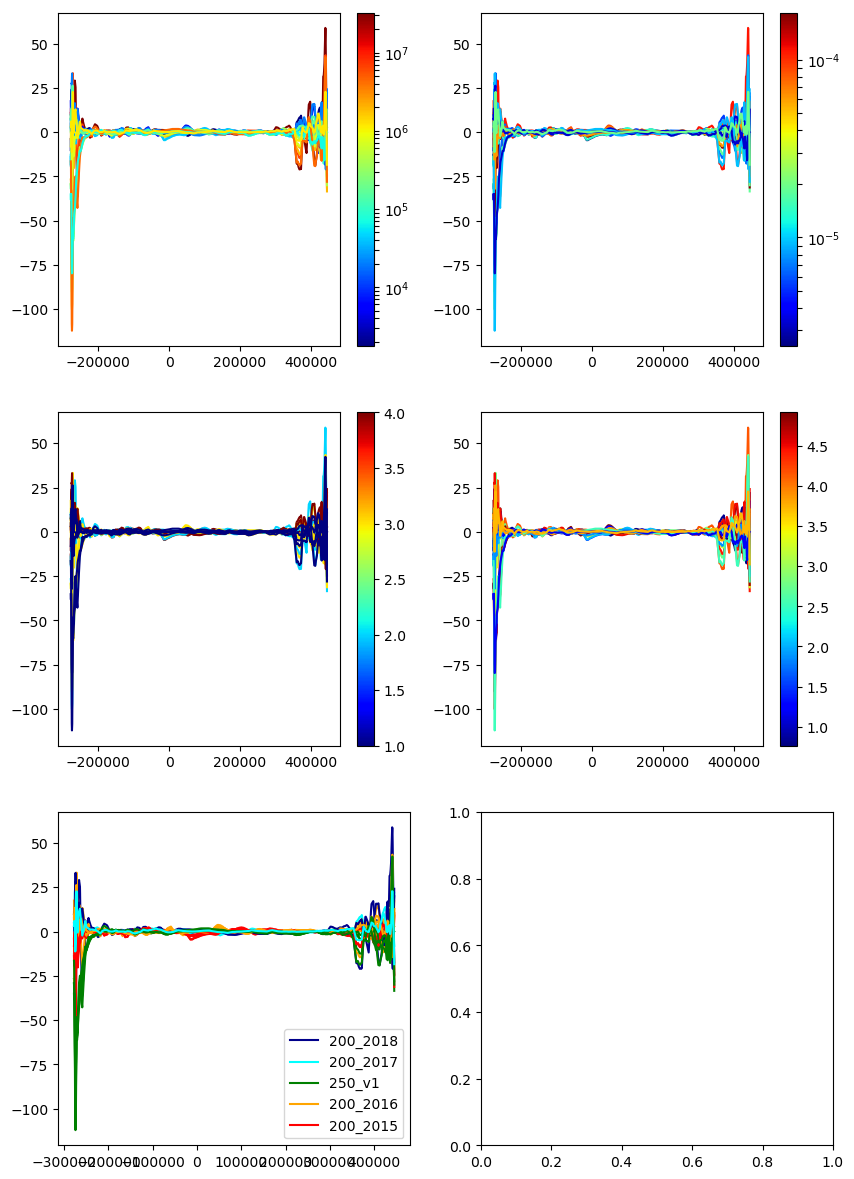

In [174]:
plotN(df_param, df_ptx,df_ssavel_med)
plotN(df_param, df_ptx.head(100),df_ssavel_med.head(100))
plotN(df_param, df_ptx.tail(100),df_ssavel_med.tail(100))
plotN(df_param, df_ptx.iloc[100:-100],df_ssavel_med.iloc[100:-100])

## Simulations transitoires

On regarde maintenant les résultats globaux et locaux des simulations transitoire. Parmi les variables globales intéressantes à tracer en fonction du temps, on retrouve principalement le bilan de masse, alors que les variables locales intéressantes sont la vitesse et le bilan de hauteur.